<a href="https://colab.research.google.com/github/theshashanksinghal/PLANT-DISEASE-DIAGNOSIS-USING-CNN/blob/master/leaf_disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import cv2
import keras
import pickle
import matplotlib.pyplot as plt
import h5py

Using TensorFlow backend.


In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!git clone https://github.com/salathegroup/plantvillage_deeplearning_paper_dataset.git


Cloning into 'plantvillage_deeplearning_paper_dataset'...
remote: Counting objects: 163224, done.
remote: Total 163224 (delta 0), reused 0 (delta 0), pack-reused 163224
Receiving objects: 100% (163224/163224), 2.00 GiB | 39.42 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Checking out files: 100% (182401/182401), done.


In [0]:
import os
PATH = os.getcwd()
# Define data path
data_path = 'plantvillage_deeplearning_paper_dataset/raw/segmented'
data_dir_list = os.listdir(data_path)
data_dir_list

['Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Early_blight',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Septoria_leaf_spot',
 'Soybean___healthy',
 'Strawberry___Leaf_scorch',
 'Squash___Powdery_mildew',
 'Corn_(maize)___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Apple___healthy',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Early_blight',
 'Tomato___Bacterial_spot',
 'Potato___Late_blight',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Strawberry___healthy',
 'Tomato___Leaf_Mold',
 'Tomato___Late_blight',
 'Grape___Black_rot',
 'Peach___Bacterial_spot',
 'Tomato___Target_Spot',
 'Apple___Cedar_apple_rust',
 'Blueberry___healthy',
 'Grape___Esca_(Black_Measles)',
 'Peach___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___healthy',
 'Apple___Apple_scab',
 

In [0]:
crops=['maize','Potato','Apple','Peach']


In [0]:
img_data_list=[]
label=[]
classes={}
l=-1
for dataset in data_dir_list:
  if any(x in dataset for x in crops):
    img_list=os.listdir(data_path+'/'+ dataset)
    l=l+1
    classes[l]=dataset
    print('l=',l)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
      input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
      input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
      input_img_resize=cv2.resize(input_img,(128,128))
      img_data_list.append(input_img_resize)
      label.append(l)


l= 0
Loaded the images of dataset-Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

l= 1
Loaded the images of dataset-Corn_(maize)___healthy

l= 2
Loaded the images of dataset-Apple___healthy

l= 3
Loaded the images of dataset-Potato___Early_blight

l= 4
Loaded the images of dataset-Potato___Late_blight

l= 5
Loaded the images of dataset-Corn_(maize)___Northern_Leaf_Blight

l= 6
Loaded the images of dataset-Peach___Bacterial_spot

l= 7
Loaded the images of dataset-Apple___Cedar_apple_rust

l= 8
Loaded the images of dataset-Peach___healthy

l= 9
Loaded the images of dataset-Apple___Apple_scab

l= 10
Loaded the images of dataset-Apple___Black_rot

l= 11
Loaded the images of dataset-Potato___healthy

l= 12
Loaded the images of dataset-Corn_(maize)___Common_rust_



In [0]:
print(len(img_data_list),len(label))
print(classes)

11832 11832
{0: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 1: 'Corn_(maize)___healthy', 2: 'Apple___healthy', 3: 'Potato___Early_blight', 4: 'Potato___Late_blight', 5: 'Corn_(maize)___Northern_Leaf_Blight', 6: 'Peach___Bacterial_spot', 7: 'Apple___Cedar_apple_rust', 8: 'Peach___healthy', 9: 'Apple___Apple_scab', 10: 'Apple___Black_rot', 11: 'Potato___healthy', 12: 'Corn_(maize)___Common_rust_'}


In [0]:

with open("drive/Colab Notebooks/abc/crops_imgs.txt",'wb') as f:
  pickle.dump(img_data_list,f)
  
with open("drive/Colab Notebooks/abc/labels.txt",'wb') as f:
  pickle.dump(label,f)
  
with open("drive/Colab Notebooks/abc/label_dict.txt",'wb') as f:
  pickle.dump(classes,f)

In [0]:
with open("drive/Colab Notebooks/abc/crops_imgs.txt",'rb') as f:
  unpickler = pickle.Unpickler(f)
  img_data_list=unpickler.load()
  
with open("drive/Colab Notebooks/abc/labels.txt",'rb') as f:
  unpickler = pickle.Unpickler(f)
  label=unpickler.load()
  
with open("drive/Colab Notebooks/abc/label_dict.txt",'rb') as f:
  unpickler = pickle.Unpickler(f)
  classes=unpickler.load()
  


'with open("drive/Colab Notebooks/abc/crops_imgs.txt",\'rb\') as f:\n  unpickler = pickle.Unpickler(f)\n  img_data_list=unpickler.load()\n  \nwith open("drive/Colab Notebooks/abc/labels.txt",\'rb\') as f:\n  unpickler = pickle.Unpickler(f)\n  label=unpickler.load()\n  \n\n\nwith open("drive/Colab Notebooks/abc/label_dict.txt",\'rb\') as f:\n  unpickler = pickle.Unpickler(f)\n  classes=unpickler.load()\n  '

In [0]:
img_data_list

[array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 64,  5,  2],
        [ 0,  0,  0, ..., 91, 32,  3],
        [ 0,  0,  0, ..., 83, 34,  3]], dtype=uint8),
 array([[  1,   1,   8, ...,   0,   0,   0],
        [  2,   1,  25, ...,   0,   0,   0],
        [  3,   2,  41, ...,   0,   0,   0],
        ...,
        [ 54,  93,  95, ...,   0,   0,   1],
        [ 60,  98, 100, ...,   0,   1,   1],
        [ 43,  80,  96, ...,   0,   1,   1]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dt

In [0]:
import numpy as np
data=np.asarray(img_data_list)

label=np.asarray(label)

In [0]:
data.shape

(11832, 128, 128)

In [0]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label=train_test_split(data,label,test_size=0.33,random_state=5)

In [0]:
train_data[0].shape
#type(train_data[0])

(128, 128)

In [0]:
# input image dimensions
img_x, img_y = 128,128
x_train = train_data.reshape(train_data.shape[0], img_x, img_y, 1)
x_test = test_data.reshape(test_data.shape[0], img_x, img_y, 1)

input_shape = (img_x, img_y, 1)


In [0]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (7927, 128, 128, 1)
7927 train samples
3905 test samples


In [0]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
num_classes=13
y_train=train_label
y_test=test_label
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
y_train[-1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [0]:
history = AccuracyHistory()

In [0]:
model.fit(x_train, y_train,
          batch_size=150,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)

Train on 7927 samples, validate on 3905 samples
Epoch 1/50
7927/7927 [==============================] - 15s 2ms/step - loss: 1.5934 - acc: 0.4845 - val_loss: 0.9731 - val_acc: 0.6615
Epoch 2/50
7927/7927 [==============================] - 13s 2ms/step - loss: 0.7480 - acc: 0.7425 - val_loss: 0.7701 - val_acc: 0.7375
Epoch 3/50
7927/7927 [==============================] - 13s 2ms/step - loss: 0.5299 - acc: 0.8171 - val_loss: 0.7228 - val_acc: 0.7575
Epoch 4/50
7927/7927 [==============================] - 13s 2ms/step - loss: 0.3987 - acc: 0.8656 - val_loss: 0.7266 - val_acc: 0.7672
Epoch 5/50
5550/7927 [====================>.........] - ETA: 3s - loss: 0.2521 - acc: 0.9157

7927/7927 [==============================] - 13s 2ms/step - loss: 0.2475 - acc: 0.9175 - val_loss: 0.7581 - val_acc: 0.7682
Epoch 6/50
7927/7927 [==============================] - 13s 2ms/step - loss: 0.1495 - acc: 0.9494 - val_loss: 0.7350 - val_acc: 0.7931
Epoch 7/50
7927/7927 [==============================] - 13s 2ms/step - loss: 0.0865 - acc: 0.9724 - val_loss: 0.8280 - val_acc: 0.7946
Epoch 8/50
7927/7927 [==============================] - 13s 2ms/step - loss: 0.0407 - acc: 0.9902 - val_loss: 0.8624 - val_acc: 0.8031
Epoch 9/50
7927/7927 [==============================] - 13s 2ms/step - loss: 0.0145 - acc: 0.9979 - val_loss: 0.9759 - val_acc: 0.7877
Epoch 10/50
1500/7927 [====>.........................] - ETA: 9s - loss: 0.0087 - acc: 0.9993

7927/7927 [==============================] - 13s 2ms/step - loss: 0.0071 - acc: 0.9992 - val_loss: 0.9896 - val_acc: 0.7921
Epoch 11/50
7927/7927 [==============================] - 13s 2ms/step - loss: 0.0031 - acc: 0.9999 - val_loss: 1.0453 - val_acc: 0.7990
Epoch 12/50
7927/7927 [==============================] - 13s 2ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.0611 - val_acc: 0.7990
Epoch 13/50
7927/7927 [==============================] - 13s 2ms/step - loss: 9.5888e-04 - acc: 1.0000 - val_loss: 1.0923 - val_acc: 0.7987
Epoch 14/50
7927/7927 [==============================] - 13s 2ms/step - loss: 7.4666e-04 - acc: 1.0000 - val_loss: 1.1205 - val_acc: 0.7985
Epoch 15/50
 750/7927 [=>............................] - ETA: 10s - loss: 6.8851e-04 - acc: 1.0000

7927/7927 [==============================] - 13s 2ms/step - loss: 6.2121e-04 - acc: 1.0000 - val_loss: 1.1351 - val_acc: 0.7974
Epoch 16/50
7927/7927 [==============================] - 13s 2ms/step - loss: 5.3020e-04 - acc: 1.0000 - val_loss: 1.1522 - val_acc: 0.7980
Epoch 17/50
7927/7927 [==============================] - 13s 2ms/step - loss: 4.4594e-04 - acc: 1.0000 - val_loss: 1.1639 - val_acc: 0.7977
Epoch 18/50
7927/7927 [==============================] - 13s 2ms/step - loss: 3.9510e-04 - acc: 1.0000 - val_loss: 1.1805 - val_acc: 0.7995
Epoch 19/50
7927/7927 [==============================] - 13s 2ms/step - loss: 3.5130e-04 - acc: 1.0000 - val_loss: 1.1891 - val_acc: 0.7990
Epoch 20/50
 150/7927 [..............................] - ETA: 11s - loss: 3.1297e-04 - acc: 1.0000

7927/7927 [==============================] - 13s 2ms/step - loss: 3.0381e-04 - acc: 1.0000 - val_loss: 1.1991 - val_acc: 0.7987
Epoch 21/50
7927/7927 [==============================] - 13s 2ms/step - loss: 2.7118e-04 - acc: 1.0000 - val_loss: 1.2104 - val_acc: 0.7990
Epoch 22/50
7927/7927 [==============================] - 13s 2ms/step - loss: 2.4564e-04 - acc: 1.0000 - val_loss: 1.2244 - val_acc: 0.7985
Epoch 23/50
7927/7927 [==============================] - 13s 2ms/step - loss: 2.2164e-04 - acc: 1.0000 - val_loss: 1.2295 - val_acc: 0.7980
Epoch 24/50
7927/7927 [==============================] - 13s 2ms/step - loss: 1.9957e-04 - acc: 1.0000 - val_loss: 1.2382 - val_acc: 0.7969
Epoch 25/50
 150/7927 [..............................] - ETA: 14s - loss: 1.3833e-04 - acc: 1.0000

7927/7927 [==============================] - 13s 2ms/step - loss: 1.8298e-04 - acc: 1.0000 - val_loss: 1.2506 - val_acc: 0.7982
Epoch 26/50
7927/7927 [==============================] - 13s 2ms/step - loss: 1.6686e-04 - acc: 1.0000 - val_loss: 1.2561 - val_acc: 0.7987
Epoch 27/50
7927/7927 [==============================] - 13s 2ms/step - loss: 1.5248e-04 - acc: 1.0000 - val_loss: 1.2624 - val_acc: 0.7967
Epoch 28/50
7927/7927 [==============================] - 13s 2ms/step - loss: 1.4122e-04 - acc: 1.0000 - val_loss: 1.2686 - val_acc: 0.7969
Epoch 29/50
7927/7927 [==============================] - 13s 2ms/step - loss: 1.3013e-04 - acc: 1.0000 - val_loss: 1.2754 - val_acc: 0.7969
Epoch 30/50
 150/7927 [..............................] - ETA: 11s - loss: 1.4910e-04 - acc: 1.0000

7927/7927 [==============================] - 13s 2ms/step - loss: 1.1973e-04 - acc: 1.0000 - val_loss: 1.2871 - val_acc: 0.7969
Epoch 31/50
7927/7927 [==============================] - 13s 2ms/step - loss: 1.1071e-04 - acc: 1.0000 - val_loss: 1.2920 - val_acc: 0.7980
Epoch 32/50
7927/7927 [==============================] - 13s 2ms/step - loss: 1.0269e-04 - acc: 1.0000 - val_loss: 1.2964 - val_acc: 0.7972
Epoch 33/50
7927/7927 [==============================] - 13s 2ms/step - loss: 9.5765e-05 - acc: 1.0000 - val_loss: 1.3027 - val_acc: 0.7972
Epoch 34/50
7927/7927 [==============================] - 13s 2ms/step - loss: 8.8960e-05 - acc: 1.0000 - val_loss: 1.3096 - val_acc: 0.7964
Epoch 35/50
 150/7927 [..............................] - ETA: 11s - loss: 8.4043e-05 - acc: 1.0000

7927/7927 [==============================] - 13s 2ms/step - loss: 8.3480e-05 - acc: 1.0000 - val_loss: 1.3189 - val_acc: 0.7964
Epoch 36/50
7927/7927 [==============================] - 13s 2ms/step - loss: 7.8518e-05 - acc: 1.0000 - val_loss: 1.3204 - val_acc: 0.7969
Epoch 37/50
7927/7927 [==============================] - 13s 2ms/step - loss: 7.2507e-05 - acc: 1.0000 - val_loss: 1.3257 - val_acc: 0.7969
Epoch 38/50
7927/7927 [==============================] - 13s 2ms/step - loss: 6.7558e-05 - acc: 1.0000 - val_loss: 1.3309 - val_acc: 0.7990
Epoch 39/50
7927/7927 [==============================] - 13s 2ms/step - loss: 6.3517e-05 - acc: 1.0000 - val_loss: 1.3371 - val_acc: 0.7972
Epoch 40/50
 150/7927 [..............................] - ETA: 11s - loss: 5.5666e-05 - acc: 1.0000

7927/7927 [==============================] - 13s 2ms/step - loss: 5.9692e-05 - acc: 1.0000 - val_loss: 1.3416 - val_acc: 0.7972
Epoch 41/50
7927/7927 [==============================] - 13s 2ms/step - loss: 5.5958e-05 - acc: 1.0000 - val_loss: 1.3462 - val_acc: 0.7972
Epoch 42/50
7927/7927 [==============================] - 13s 2ms/step - loss: 5.2687e-05 - acc: 1.0000 - val_loss: 1.3525 - val_acc: 0.7964
Epoch 43/50
7927/7927 [==============================] - 13s 2ms/step - loss: 4.9465e-05 - acc: 1.0000 - val_loss: 1.3556 - val_acc: 0.7962
Epoch 44/50
7927/7927 [==============================] - 13s 2ms/step - loss: 4.7031e-05 - acc: 1.0000 - val_loss: 1.3580 - val_acc: 0.7982
Epoch 45/50
 150/7927 [..............................] - ETA: 11s - loss: 3.4463e-05 - acc: 1.0000

7927/7927 [==============================] - 13s 2ms/step - loss: 4.4288e-05 - acc: 1.0000 - val_loss: 1.3658 - val_acc: 0.7969
Epoch 46/50
7927/7927 [==============================] - 13s 2ms/step - loss: 4.1603e-05 - acc: 1.0000 - val_loss: 1.3720 - val_acc: 0.7969
Epoch 47/50
7927/7927 [==============================] - 13s 2ms/step - loss: 3.9566e-05 - acc: 1.0000 - val_loss: 1.3736 - val_acc: 0.7972
Epoch 48/50
7927/7927 [==============================] - 13s 2ms/step - loss: 3.7483e-05 - acc: 1.0000 - val_loss: 1.3794 - val_acc: 0.7980
Epoch 49/50
7927/7927 [==============================] - 13s 2ms/step - loss: 3.5564e-05 - acc: 1.0000 - val_loss: 1.3830 - val_acc: 0.7992
Epoch 50/50
 150/7927 [..............................] - ETA: 11s - loss: 4.2139e-05 - acc: 1.0000

7927/7927 [==============================] - 13s 2ms/step - loss: 3.3447e-05 - acc: 1.0000 - val_loss: 1.3854 - val_acc: 0.7982


In [0]:
model.save('drive/Colab Notebooks/abc/leafmodel.h5')

In [0]:
from keras.models import load_model
model = load_model('drive/Colab Notebooks/abc/leafmodel.h5')


In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3853633692566778
Test accuracy: 0.7982074263764405


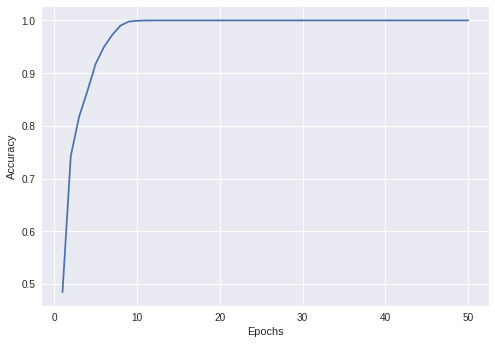

In [0]:
plt.plot(range(1, 51), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
# input image dimensions
img_x, img_y = 128,128
input_img=cv2.imread('drive/Colab Notebooks/abc/corn.jpg')
print(type(input_img))
input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
input_img_resize=cv2.resize(input_img,(128,128))
input_img=input_img_resize.reshape(1,img_x,img_y,1)
input_img = input_img.astype('float32')
input_img /= 255



<class 'numpy.ndarray'>


In [0]:
ans=model.predict_classes(input_img)
print(ans[0])
classes[ans[0]]

1


'Corn_(maize)___healthy'